In [3]:
"""
Name: Daryl Hou
EmaiL: daryl.hou08@myhunter.cuny.edu
pod: rear left
"""

'\nName: Daryl Hou\nEmaiL: daryl.hou08@myhunter.cuny.edu\npod: rear left\n'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler



# Data

In [5]:
user_tweets = pd.read_csv("user_tweets.csv")
user_tweets.head()


/var/folders/3c/0zgj7v1s4tb_qbtl2rhdph680000gn/T/ipykernel_40902/1490952106.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  user_tweets = pd.read_csv("user_tweets.csv")


,id,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,...,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200
0,160881623,@andresitonieve Me he quedado igual estoy llor...,RT @heikala_art: Fragment of a Star 💫 Celebrat...,RT @bananamisart: I heard it was BOtW's 3rd an...,RT @night_sprout: new banner time!! https://t....,RT @dealer_rug: Why is everyone buying toilet ...,@andresitonieve Amo el diseño de este personaje,RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...,RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....,RT @Lesfleursdmal: Os dejo esto por aquí por s...,...,NOOOOOOOOOOO MURCIA HA CAÍDO TAMBIÉN 😔😔😔,@ederugaruto Si te están amenazando de esa man...,19. Siempre me han encantado los días de fuego...,RT @pupa_puuupa: 4〜6 https://t.co/Hhdv33tWOi,RT @TANA_in_: 뜨거운 여름 밤은 가고 남은 건 볼품없지만 https://...,RT @Vivi95862484: ❤️💙 https://t.co/OAv2F1FKLc,RT @gomachino: ミツナルの日 https://t.co/9b44lJtHDW,RT @_KUZUDANA_: ❤️ミツナルの日💙 https://t.co/7wCGN8Wgl9,RT @Locarconio: 🔴 Ciertos youtubers están en M...,RT @charllandsberg: Asexual women in South Afr...
1,28968838,"PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...",RT @sofeimous: Look at this cutie! Thank you f...,"'kelangan talaga lumipat ng bahay, pero di ka ...",forgiveness and justice.\nforgiveness with jus...,hirap maging babae no? #PamilyaKoPagkabuwag,"eh damang-dama ko yung pagod ni luz, yung pago...","oo nga no? makes you think, what's your deal-b...",hay nako si apol timing fail talaga.\n#Pamilya...,RT @tracy_erickson: Halimaw si Sylvia Sanchez....,...,RT @GingerSpirits: AB giving me Lucas content?...,RT @musicfanforeva2: god bless the writers of ...,RT @AtheerforAnne: @TahiraOsman4 https://t.co/...,RT @TahiraOsman4: Who can pinpoint the exact m...,"RT @TahiraOsman4: Dear Gilbert,\n\nI'm throwin...",RT @TahiraOsman4: (ANNE NATION)\n\nwe are ever...,RT @TahiraOsman4: (what is love)\n\nloving is ...,RT @MikhaelVervoort: This Anne Nation. \n\nAdd...,RT @aqbeltran0612: To fail means we’ve tried. ...,@Kermit5010 hahahahahahaha! tingnan natin! mah...
2,2325006565,みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...,RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...,RT @taiki__official: 今日は #佐藤の日 らしいです😂,RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...,RT @generationsfext: #GENERATIONS WORLD TOUR 2...,PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...,PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...,RT @HimeROAR: Does nails and puts on makeup to...,RT @kapsulecore: I hate to come on main and so...,...,RT @NYLONJAPAN: “今週何買う？”をテーマに男女共に楽しめるファッションページ...,@coffeebourbon OMFG,RT @MLBJapan: 【 #ドジャース 】3度の #サイヤング賞 左腕が今日も好投！3...,RT @LDH__TV: 本日21時配信📺\n大好評🎉✨16人での慰安旅行未公開ベスト10🎞...,I pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて、,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,"RT @tkn0801: Alright guys, cherry blossom seas...",NaN
3,907848145,RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...,RT @lqldks: when is this from??? 😭😭😭 https://t...,"RT @j__nmyeon: since we're talking about suhø,...",I am supporting this fundraising page https://...,RT @cubsie_: Sun and moon outfits https://t.co...,@mouthysehun that looks like porridge AND TO D...,"RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...",RT @sukaihan: this is definitely one of my fav...,RT @bblyds: oh to be watching the rain and lis...,...,RT @sehunownsme: [hunstagram] Remember to your...,RT @mishyeol: [🖼WP] \nEXO-L Welcome Kit Photo ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1330237585,@DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻,RT @DaryKiri_: @nemuiryuu Gracias por poner en...,https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK,RT @izzyhumair: Rt if you give Goths permissio...,"@ageyoru Dw you’re absolutely right, stan heal...",🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU,stop asking for my money cygames I don’t have any,@vonfriedhof Desde luego se están esforzando e...,RT @Ryusei_Rainbow_: “If you’re going to start...,...,nothing as expected,this game was a mistake,fuck it 

In [6]:
user_info = pd.read_csv("user_info.csv")
user_info.head()

,id,id_str,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,160881623,160881623,Biam 🍃 32 Days AC 🌴🌹,_AiBiam,Hateno Village,🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...,False,1904,782,67,...,139,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,28968838,28968838,pao,paoacflores,Mandaluyong/StaCruz Laguna PH,right brained lefty. infp. hufflepuff. collect...,False,14135,1338,47,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,2325006565,2325006565,pengu🌻❤️🍓@青鳥王国,PenguPooh,PengUstine CCTV,🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...,False,1223,604,31,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,907848145,907848145,lynn bean,sukaihan,Singapore,"eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...",False,8512,312,147,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,1330237585,1330237585,Sei💫,nemuiryuu,NaN,【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P,False,1805,340,69,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000


In [7]:
user_info.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description',
       'verified', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'number_of_quoted_statuses',
       'number_of_retweeted_statuses', 'total_retweet_count',
       'total_favorite_count', 'total_hashtag_count', 'total_url_count',
       'total_mentions_count', 'total_media_count', 'number_of_tweets_scraped',
       'average_tweet_length', 'average_retweet_count',
       'average_favorite_count', 'average_hashtag_count', 'average_url_count',
       'average_mentions_count', 'average_media_count'],
      dtype='object')

In [8]:
mbti = pd.read_csv("mbti_labels.csv")
mbti.head()

,id,mbti_personality
0,160881623,infp
1,28968838,infp
2,2325006565,infp
3,907848145,infp
4,1330237585,infp


In [9]:
print(mbti['mbti_personality'].unique())


['infp' 'enfp' 'isfp' 'esfp' 'intp' 'entp' 'istp' 'estp' 'infj' 'enfj'
 'isfj' 'esfj' 'intj' 'entj' 'istj' 'estj']


In [10]:
edges = pd.read_csv("edges.csv")
edges.head()

,follower_id,followee_id
0,5660312,1654576440
1,1654576440,5660312
2,3387707473,3020047310
3,782987339425603584,3020047310
4,832635154610860037,3020047310


#### **Observations**
- User tweets may contain unnecessary information such as urls, mentions, and hashtags.
- User info may contain unnecessary information such as id_str, name, screen_name, location, and description.

#### **Impact**
- Drop columns from user info that are not needed.
- Convert verified to numeric.


# Cleaning

In [11]:
import importlib
import preprocessing
from preprocessing import clean_tweet
# Reload the preprocessing module to ensure latest changes are loaded
importlib.reload(preprocessing)


<module 'preprocessing' from '/Users/daryl/Downloads/twitter-personality-model-main/preprocessing.py'>

In [12]:
from preprocessing import add_cleaned_prefix

# Get all column names except 'id'
tweet_columns = [col for col in user_tweets.columns if col != 'id' and not col.startswith('cleaned_')]

cleaned_df = pd.DataFrame({
    'id': user_tweets['id'],
    **{
        add_cleaned_prefix(col): user_tweets[col].apply(clean_tweet)
        for col in tweet_columns
    }
})

In [13]:
cleaned_df.head()

,id,cleaned_tweet_1,cleaned_tweet_2,cleaned_tweet_3,cleaned_tweet_4,cleaned_tweet_5,cleaned_tweet_6,cleaned_tweet_7,cleaned_tweet_8,cleaned_tweet_9,...,cleaned_tweet_191,cleaned_tweet_192,cleaned_tweet_193,cleaned_tweet_194,cleaned_tweet_195,cleaned_tweet_196,cleaned_tweet_197,cleaned_tweet_198,cleaned_tweet_199,cleaned_tweet_200
0,160881623,me he quedado igual estoy llorando,fragment of a star dizzy celebrating my annive...,i heard it was botws rd anniversary and ive be...,new banner time,why is everyone buying toilet paper its the co...,amo el diseño de este personaje,unfortunately i cant stop watching this tiktok...,its so cute ahhhhhhhloudly_crying_face,os dejo esto por aquí por si estáis teniendo u...,...,nooooooooooo murcia ha caído también pensive_f...,si te están amenazando de esa manera no tienes...,siempre me han encantado los días de fuegos ar...,,뜨거운 여름 밤은 가고 남은 건 볼품없지만,red_heartblue_heart,ミツナルの日,red_heartミツナルの日blue_heart,red_circle ciertos youtubers están en madrid d...,asexual women in south africa suffer correctiv...
1,28968838,please vote vote vote for amybeth thanks it wo...,look at this cutie thank you for trusting and...,kelangan talaga lumipat ng bahay pero di ka na...,forgiveness and justice forgiveness with justi...,hirap maging babae no pamilyakopagkabuwag,eh damang-dama ko yung pagod ni luz yung pagod...,oo nga no makes you think whats your deal-brea...,hay nako si apol timing fail talaga pamilyakop...,halimaw si sylvia sanchez in every definition ...,...,ab giving me lucas content we love to see it o...,god bless the writers of anne with an e,in all of these scenes i feel that anne in lov...,who can pinpoint the exact moment anne falls f...,dear gilbert im throwing the rules out the wi...,anne nation we are everyone from every place...,what is love loving is learning that words c...,this anne nation added active accounts only ...,to fail means weve tried to be hurt means weve...,hahahahahahaha tingnan natin mahal ko nga pero...
2,2325006565,みんなからの匿名質問を募集中 こんな質問に答えてるよ hello this is ...,今日は佐藤の日 star-struckbeating_heart 我らが座長 佐藤大樹 さ...,今日は 佐藤の日 らしいですface_with_tears_of_joy,auditionblue 月号発売中です 本日月日は佐藤の日ということで 大反響にお応えして...,generations world tour generation ex この後 ldh...,pengupooh いいねされた数前日比 フォローした数前日比 フォローされた数前日比,pengupooh ツイート数前日比 rtした数前日比 rtされた数前日比 送ったリプライ数...,does nails and puts on makeup to take selfies,i hate to come on main and sound like im beggi...,...,今週何買うをテーマに男女共に楽しめるファッションページget new stuff今回は春にな...,omfg,ドジャース 度の サイヤング賞 左腕が今日も好投回失点奪三振 スプリングトレーニング,本日時配信television 大好評party_poppersparkles人での慰安旅行...,i pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,alright guys cherry blossom season is coming u...,
3,907848145,woman_shrugging exolselcaday,when is this from loudly_crying_faceloudly_cry...,since were talking about suhø a friendly remin...,i am supporting this fundraising page and i t...,sun and moon outfits,that looks like porridge and to drain it is te...,au revoir paris 세훈 backhand_index_pointing_ri...,this is definitely one of my fav seho moments ...,oh to be watching the rain and listening to ja...,...,hunstagram remember to your vitamins its cold ...,framed_picturewp exo-l welcome kit photo wall...,,,,,,,,
4,1330237585,gracias a ti por apreciarlo loudly_crying_face...,gracias por poner en mi tl contenido de aikats...,,if you give goths permission to pose and take ...,dw youre absolutely right stan healing good pr...,nauseated_facenauseated_facenauseated_facenaus...,stop asking for my money cygames i dont have any,desde luego se están esforzando en que nos pla...,if youre going to start gbf i recommend doing ...,...,nothing as expected,this game was a mistake,fuck it im using my shitty pulls im sad,yo también lo odio,,oomf got hades and i need hades,i wanna cry,i hate u omg please give,i wanna quit this game soooo bad,a una amiga igual qué horror


In [14]:
print(cleaned_df[~cleaned_df['id'].astype(str).str.isnumeric()]['id'].head())


39                      1. The Mercy of Allah
40                        2. The Power of Dua
41       Good things comes to those who wait!
141    -James Wildman https://t.co/MzjAnMmTYf
381                 Ya Allah give me success.
Name: id, dtype: object


#### **Observations**
- There are some ids that are not numeric.

#### **Impact**
- Drop rows where id is not numeric.


In [15]:
cleaned_df = cleaned_df[cleaned_df['id'].astype(str).str.match('^\d+$')]
cleaned_df['id'] = cleaned_df['id'].astype('int64')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/3c/0zgj7v1s4tb_qbtl2rhdph680000gn/T/ipykernel_40902/3014427688.py:1: SyntaxWarning: invalid escape sequence '\d'
  cleaned_df = cleaned_df[cleaned_df['id'].astype(str).str.match('^\d+$')]


In [16]:
# Drop non-essential columns and convert verified to numeric
user_info_cleaned = user_info.drop(columns=[
    'id_str', 'name', 'screen_name', 'location', 'description'
])

# Convert verified column to numeric (True -> 1, False -> 0)
user_info_cleaned['verified'] = user_info_cleaned['verified'].astype(int)
user_info_cleaned.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,total_mentions_count,total_media_count,number_of_tweets_scraped,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,139,114,200.0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,156,34,200.0,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,170,40,199.0,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,174,77,192.0,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,127,99,200.0,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000


In [17]:
# Merge user info with cleaned tweets and mbti labels
combined_df = pd.merge(user_info_cleaned, cleaned_df, on='id')
combined_df = pd.merge(combined_df, mbti, on='id')

combined_df.head()


,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,cleaned_tweet_192,cleaned_tweet_193,cleaned_tweet_194,cleaned_tweet_195,cleaned_tweet_196,cleaned_tweet_197,cleaned_tweet_198,cleaned_tweet_199,cleaned_tweet_200,mbti_personality
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,si te están amenazando de esa manera no tienes...,siempre me han encantado los días de fuegos ar...,,뜨거운 여름 밤은 가고 남은 건 볼품없지만,red_heartblue_heart,ミツナルの日,red_heartミツナルの日blue_heart,red_circle ciertos youtubers están en madrid d...,asexual women in south africa suffer correctiv...,infp
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,god bless the writers of anne with an e,in all of these scenes i feel that anne in lov...,who can pinpoint the exact moment anne falls f...,dear gilbert im throwing the rules out the wi...,anne nation we are everyone from every place...,what is love loving is learning that words c...,this anne nation added active accounts only ...,to fail means weve tried to be hurt means weve...,hahahahahahaha tingnan natin mahal ko nga pero...,infp
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,omfg,ドジャース 度の サイヤング賞 左腕が今日も好投回失点奪三振 スプリングトレーニング,本日時配信television 大好評party_poppersparkles人での慰安旅行...,i pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,alright guys cherry blossom season is coming u...,,infp
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,framed_picturewp exo-l welcome kit photo wall...,,,,,,,,,infp
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,this game was a mistake,fuck it im using my shitty pulls im sad,yo también lo odio,,oomf got hades and i need hades,i wanna cry,i hate u omg please give,i wanna quit this game soooo bad,a una amiga igual qué horror,infp


In [18]:
combined_df.isnull().sum().sort_values(ascending=False)

id                   0
verified             0
cleaned_tweet_120    0
cleaned_tweet_121    0
cleaned_tweet_122    0
                    ..
cleaned_tweet_56     0
cleaned_tweet_57     0
cleaned_tweet_58     0
cleaned_tweet_59     0
mbti_personality     0
Length: 224, dtype: int64

#### **Observations**
- Our combined dataframe is a combination of user info, tweets, and mbti labels.
- There are no missing values in the combined dataframe.


# Exploratory Data Analysis

In [19]:
combined_df['mbti_personality'].unique()

array(['infp', 'enfp', 'isfp', 'esfp', 'intp', 'entp', 'istp', 'estp',
       'infj', 'enfj', 'isfj', 'esfj', 'intj', 'entj', 'istj', 'estj'],
      dtype=object)

In [20]:
import eda
importlib.reload(eda)

<module 'eda' from '/Users/daryl/Downloads/twitter-personality-model-main/eda.py'>

In [21]:
from eda import (
    analyze_follow_proportions,
    plot_mbti_distribution,
    plot_tweet_metrics_by_mbti,
    plot_followers_by_mbti,
    plot_mbti_follow_matrix,
)

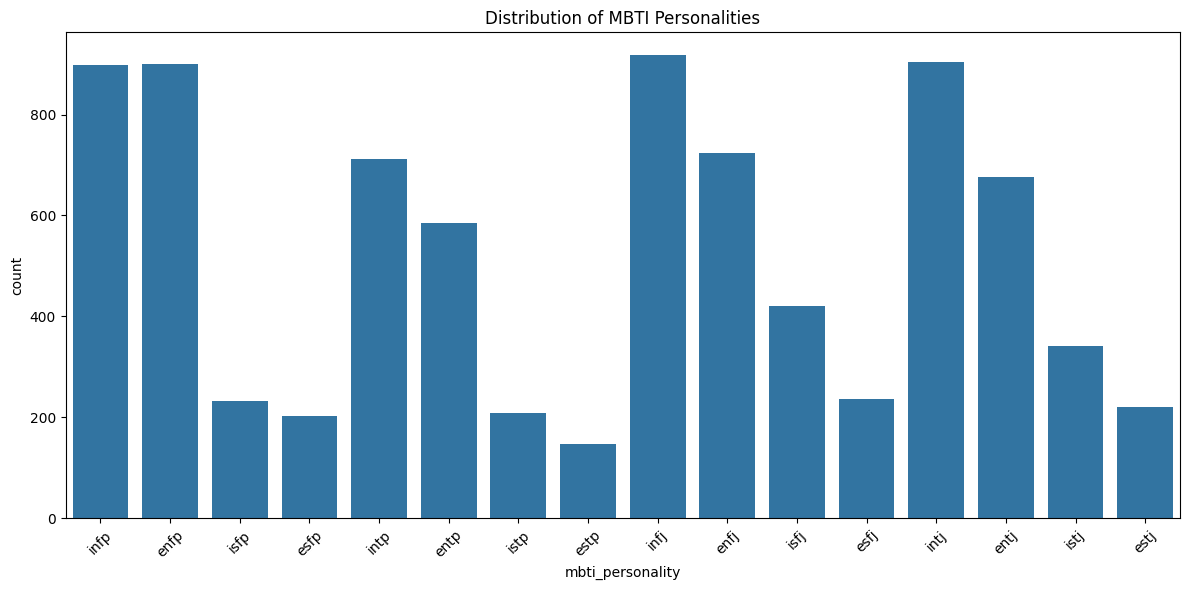

In [22]:
# Create a bar plot of MBTI personality distribution
plot_mbti_distribution(combined_df)

#### Key Observations:
- INFP ENFP INTJ and INFJ are the most common types
- ESFP, ESTP, ESFJ, ESTJ, ISFP, ISTP have the lowest representation,
- Introverted types (I___) appear more frequently than extroverted types (E___)
- There is a clear skew towards intuitive types (N) over sensing types (S)

#### Insights:
- The significant imbalance in personality types could lead to biased model predictions
- The high prevalence of introverted and intuitive types suggests potential self-selection bias

/Users/daryl/Downloads/twitter-personality-model-main/eda.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/Users/daryl/Downloads/twitter-personality-model-main/eda.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/Users/daryl/Downloads/twitter-personality-model-main/eda.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/Users/daryl/Downloads/twitter-personality-model-main/eda.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


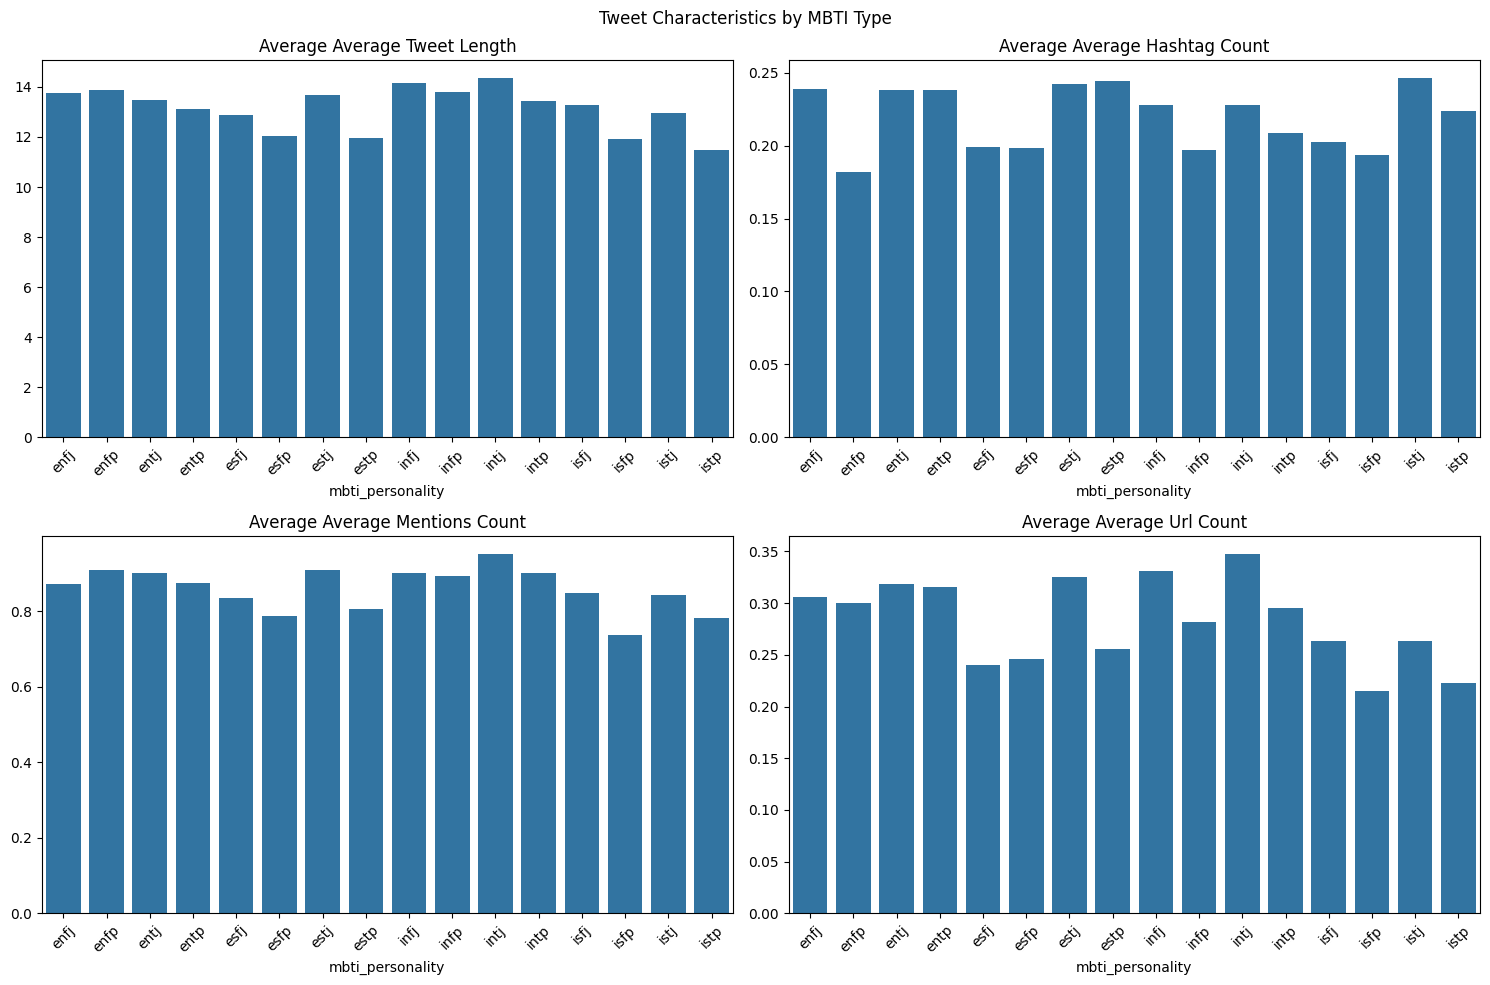

In [23]:
# Plot tweet metrics by MBTI type
plot_tweet_metrics_by_mbti(combined_df)

#### Key Observations:
- There seems to be no correlation between tweet metrics and MBTI personality type.

#### Insights:
- Tweet metrics may not be strong predictors of MBTI personality type.

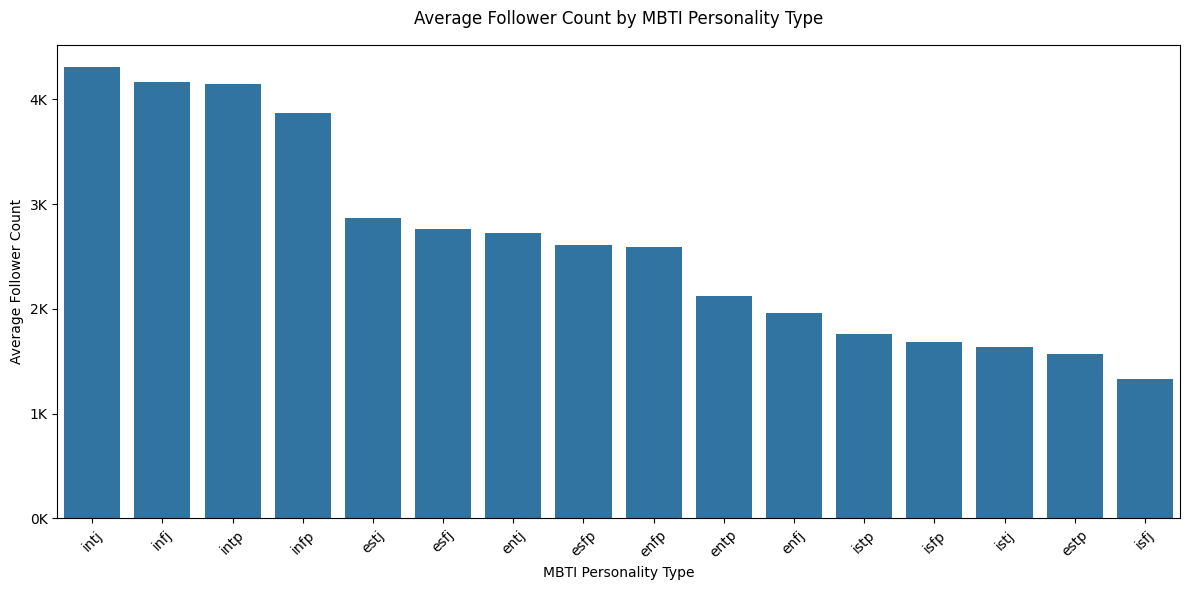

In [24]:
plot_followers_by_mbti(combined_df)

#### Key Observations:
- Introverted and Intuitive types seem to have the most followers as they occupy the top 4 spots.

#### Insights:
- Being extroverted doesnt necessarily mean you have more followers.

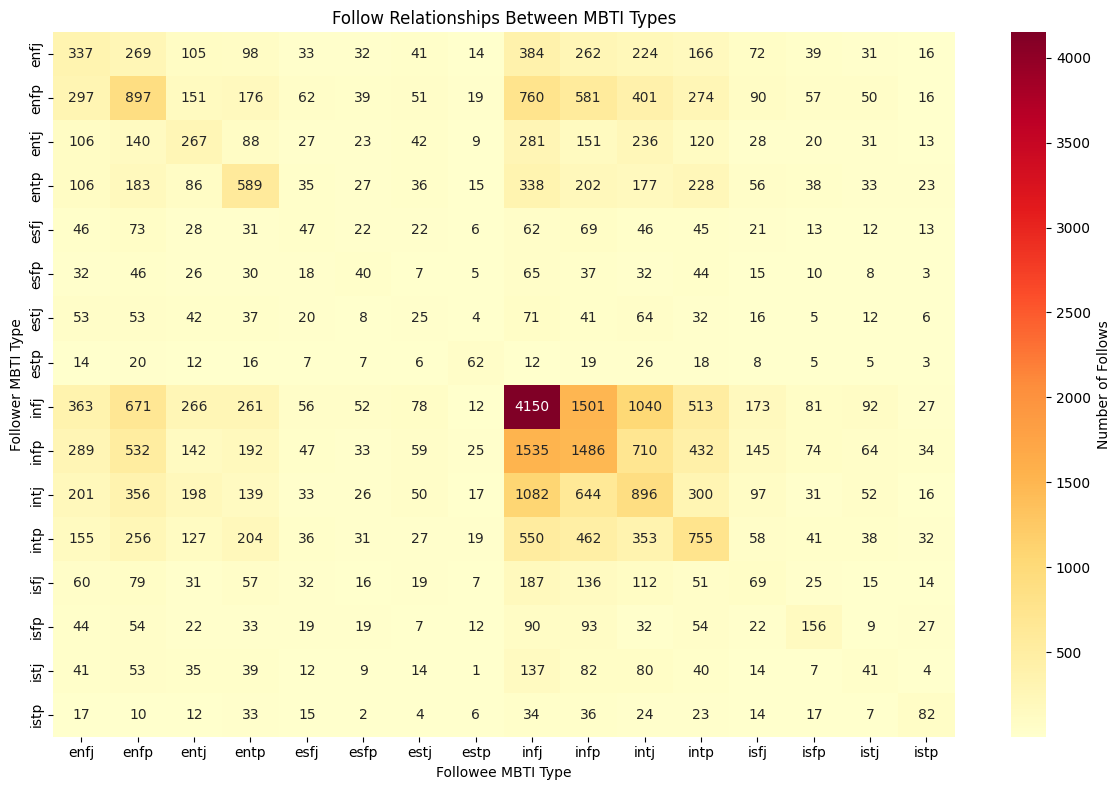

In [25]:
follow_matrix = plot_mbti_follow_matrix(edges, mbti)

In [26]:
proportions = analyze_follow_proportions(follow_matrix)

Proportion of same-type follows by personality:
infj    44.45%
entp    27.12%
estp    25.83%
infp    25.63%
istp    24.40%
intp    24.01%
enfp    22.88%
isfp    22.51%
intj    21.65%
entj    16.88%
enfj    15.87%
esfp     9.57%
esfj     8.45%
isfj     7.58%
istj     6.73%
estj     5.11%
dtype: object


#### Key Observations:
- There is a strong concentration of follows along the diagonal of the heatmap.

#### Insights:
- Suggests "personality homophily" where people with the same personality type follow each other.
- The clustering of follows among similar types might suggest natural community formation based on personality.

# Feature Engineering

In [27]:
tweet_columns = [col for col in combined_df.columns if col.startswith('cleaned_tweet')]
combined_df['all_tweets'] = combined_df[tweet_columns].apply(
    lambda x: ' '.join(str(tweet) for tweet in x if str(tweet).strip() != '' and str(tweet) != 'nan'),
    axis=1
)
combined_df.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,cleaned_tweet_193,cleaned_tweet_194,cleaned_tweet_195,cleaned_tweet_196,cleaned_tweet_197,cleaned_tweet_198,cleaned_tweet_199,cleaned_tweet_200,mbti_personality,all_tweets
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,siempre me han encantado los días de fuegos ar...,,뜨거운 여름 밤은 가고 남은 건 볼품없지만,red_heartblue_heart,ミツナルの日,red_heartミツナルの日blue_heart,red_circle ciertos youtubers están en madrid d...,asexual women in south africa suffer correctiv...,infp,me he quedado igual estoy llorando fragment of...
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,in all of these scenes i feel that anne in lov...,who can pinpoint the exact moment anne falls f...,dear gilbert im throwing the rules out the wi...,anne nation we are everyone from every place...,what is love loving is learning that words c...,this anne nation added active accounts only ...,to fail means weve tried to be hurt means weve...,hahahahahahaha tingnan natin mahal ko nga pero...,infp,please vote vote vote for amybeth thanks it wo...
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,ドジャース 度の サイヤング賞 左腕が今日も好投回失点奪三振 スプリングトレーニング,本日時配信television 大好評party_poppersparkles人での慰安旅行...,i pressed the up button on an elevator that wa...,笑,とにかくアホみたいな歩き方してるって想像してみて,前からペンギンっぽいって言われてたんだけどお腹大きくなって歩き方はもっとペンギンっぽくなった...,alright guys cherry blossom season is coming u...,,infp,みんなからの匿名質問を募集中 こんな質問に答えてるよ hello this is ...
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,,,,,,,,,infp,woman_shrugging exolselcaday when is this from...
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,fuck it im using my shitty pulls im sad,yo también lo odio,,oomf got hades and i need hades,i wanna cry,i hate u omg please give,i wanna quit this game soooo bad,a una amiga igual qué horror,infp,gracias a ti por apreciarlo loudly_crying_face...


In [28]:
# Display a single row of all_tweets to see the concatenated tweets
print("\nExample of concatenated tweets for one user:")
print("-" * 80)
print(combined_df['all_tweets'].iloc[0])



Example of concatenated tweets for one user:
--------------------------------------------------------------------------------
me he quedado igual estoy llorando fragment of a star dizzy celebrating my anniversary with botw with this piece sparklestwo_hearts i heard it was botws rd anniversary and ive been playing it a lot lately so have a silly link taking a dangerous selfi new banner time why is everyone buying toilet paper its the coronavirus not the chorrovirus amo el diseño de este personaje unfortunately i cant stop watching this tiktok of a man cosplaying jim carreys dr robotnik dancing to carameldansen its so cute ahhhhhhhloudly_crying_face os dejo esto por aquí por si estáis teniendo un mal día 構ってほしい asakusa gets a haircut  映像研 keepyourhandsoffeizouken ill be your friend gengar knight demasiado furry para mi gusto un respeto que es mi fav espero que pongan el día de las gilipllas así puede celebrarlo mejor que el ah coño de eso no me acuerdo hace mucho que vi esa xd todos has

We created a new column called all_tweets which is a concatenation of all the tweets for each user.

In [29]:
onehot = OneHotEncoder(sparse_output=False)
mbti_encoded = onehot.fit_transform(combined_df[['mbti_personality']])

# Create new columns for each MBTI type
mbti_types = onehot.categories_[0]  # Get the MBTI type names
for idx, mbti_type in enumerate(mbti_types):
    combined_df[f'is_{mbti_type.lower()}'] = mbti_encoded[:, idx]
combined_df.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,is_estj,is_estp,is_infj,is_infp,is_intj,is_intp,is_isfj,is_isfp,is_istj,is_istp
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We created a new column for each MBTI type and encoded it using onehot encoding.

In [30]:
# Create list of desired columns
columns_to_keep = [
    'id',
    'verified',
    'followers_count',
    'friends_count',
    'listed_count',
    'favourites_count',
    'statuses_count',
    'number_of_quoted_statuses',
    'number_of_retweeted_statuses',
    'total_retweet_count',
    'total_favorite_count',
    'total_hashtag_count',
    'total_url_count',
    'total_mentions_count',
    'total_media_count',
    'number_of_tweets_scraped',
    'average_tweet_length',
    'average_retweet_count',
    'average_favorite_count',
    'average_hashtag_count',
    'average_url_count',
    'average_mentions_count',
    'average_media_count',
    'all_tweets'
] + [col for col in combined_df.columns if col.startswith('is_')]

# Create final dataframe
final_df = combined_df[columns_to_keep]
final_df.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,is_estj,is_estp,is_infj,is_infp,is_intj,is_intp,is_isfj,is_isfp,is_istj,is_istp
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_df.columns


Index(['id', 'verified', 'followers_count', 'friends_count', 'listed_count',
       'favourites_count', 'statuses_count', 'number_of_quoted_statuses',
       'number_of_retweeted_statuses', 'total_retweet_count',
       'total_favorite_count', 'total_hashtag_count', 'total_url_count',
       'total_mentions_count', 'total_media_count', 'number_of_tweets_scraped',
       'average_tweet_length', 'average_retweet_count',
       'average_favorite_count', 'average_hashtag_count', 'average_url_count',
       'average_mentions_count', 'average_media_count', 'all_tweets',
       'is_enfj', 'is_enfp', 'is_entj', 'is_entp', 'is_esfj', 'is_esfp',
       'is_estj', 'is_estp', 'is_infj', 'is_infp', 'is_intj', 'is_intp',
       'is_isfj', 'is_isfp', 'is_istj', 'is_istp'],
      dtype='object')

In [32]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(final_df['all_tweets'].tolist(), 
                         batch_size=32)

In [33]:
embedding_df = pd.DataFrame(
    embeddings,
    columns=[f'embed_{i}' for i in range(embeddings.shape[1])],
    index=final_df.index
)

model_ready_df = pd.concat([
    final_df.drop(['all_tweets'], axis=1),  # Original features
    embedding_df  # Embedding features
], axis=1)

In [34]:
model_ready_df.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,embed_374,embed_375,embed_376,embed_377,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383
0,160881623,0,1904,782,67,133836,410600,14,103,600716,...,0.055464,-0.042925,0.075087,0.091582,0.027997,0.030350,0.103315,0.038121,-0.066888,-0.040667
1,28968838,0,14135,1338,47,103794,358901,23,113,743749,...,-0.005929,-0.066757,0.027185,0.066747,-0.024244,0.002477,0.048105,-0.016375,0.090353,-0.041146
2,2325006565,0,1223,604,31,178178,312384,17,93,740720,...,-0.072528,0.038171,0.004603,0.099376,-0.025330,-0.015234,0.039791,0.019284,-0.046880,0.062909
3,907848145,0,8512,312,147,40136,282995,24,135,1925514,...,0.016238,0.015142,-0.035845,0.130721,-0.006674,-0.001954,0.083743,0.045271,-0.130263,-0.006423
4,1330237585,0,1805,340,69,151521,244181,2,68,165474,...,0.035833,-0.003072,0.035786,0.133275,-0.000594,-0.024696,0.038201,-0.001514,-0.061100,0.027988


We used the SentenceTransformer('all-MiniLM-L6-v2') model to encode the tweets into embeddings. <br/><br/>
Here we created a new dataframe called model_ready_df which is a combination of the original features and the embeddings. 



In [35]:
# Get numerical columns (excluding embeddings and target variables)
numerical_cols = [col for col in model_ready_df.columns 
                 if not col.startswith('embed_')
                 and not col.startswith('is_') 
                 and col not in ['id', 'all_tweets'] 
                 and model_ready_df[col].dtype in ['int64', 'float64']]

# Scale numerical features
scaler = StandardScaler()
model_ready_df[numerical_cols] = scaler.fit_transform(model_ready_df[numerical_cols])

In [36]:
model_ready_df.head()

,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,embed_374,embed_375,embed_376,embed_377,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383
0,160881623,-0.106846,-0.060868,-0.055653,0.081702,3.437834,9.062283,-0.339083,0.889102,-0.011976,...,0.055464,-0.042925,0.075087,0.091582,0.027997,0.030350,0.103315,0.038121,-0.066888,-0.040667
1,28968838,-0.106846,0.624667,-0.007936,-0.031052,2.546995,7.848062,0.146900,1.097654,0.100749,...,-0.005929,-0.066757,0.027185,0.066747,-0.024244,0.002477,0.048105,-0.016375,0.090353,-0.041146
2,2325006565,-0.106846,-0.099037,-0.070930,-0.121255,4.752712,6.755547,-0.177089,0.680551,0.098362,...,-0.072528,0.038171,0.004603,0.099376,-0.025330,-0.015234,0.039791,0.019284,-0.046880,0.062909
3,907848145,-0.106846,0.309504,-0.095990,0.532718,0.659338,6.065306,0.200898,1.556468,1.032101,...,0.016238,0.015142,-0.035845,0.130721,-0.006674,-0.001954,0.083743,0.045271,-0.130263,-0.006423
4,1330237585,-0.106846,-0.066417,-0.093587,0.092977,3.962249,5.153706,-0.987059,0.159171,-0.354991,...,0.035833,-0.003072,0.035786,0.133275,-0.000594,-0.024696,0.038201,-0.001514,-0.061100,0.027988


Lastly we scaled the numberical features in order to prevent the model from being biased towards features with larger values.

# Machine Learning

### Method 1: 16-class classification
Each MBTI type is treated as a seperate class. <br/>
The model is trained to predict one of the 16 types directly.

In [37]:
target_columns = [col for col in model_ready_df.columns if col.startswith('is_')]
feature_columns = [col for col in model_ready_df.columns if not col.startswith('is_') and col != 'id']

X = model_ready_df[feature_columns]
y = model_ready_df[target_columns]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [39]:
y_train_single = y_train.idxmax(axis=1)
y_test_single = y_test.idxmax(axis=1)

In [40]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(   
     n_estimators=200,          
    max_depth=None,            
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',   
    random_state=42,
    n_jobs=-1  )
rf_model.fit(X_train, y_train_single)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test_single, y_pred)
accuracy 


0.1722689075630252

The results depict an accuracy of 17.22% which is slightly better than random guessing. <br/>
1/16 = 6.25% <br/><br/>
There is likely class imbalance as the classes are not represented evenly in the dataset.


### Method 2: 4-class classification
Each dimension is treated as a seperate class. <br/>
The model is trained to predict one of the 4 dimensions directly.

In [42]:
# Split target variables

model_ready_df['personality_type'] = model_ready_df[[col for col in model_ready_df.columns if col.startswith('is_')]].idxmax(axis=1).str[3:]

model_ready_df['I/E'] = model_ready_df['personality_type'].apply(lambda x: 1 if 'e' in x else 0)  # 1 for Extroverted
model_ready_df['S/N'] = model_ready_df['personality_type'].apply(lambda x: 1 if 'n' in x else 0)  # 1 for iNtuitive
model_ready_df['T/F'] = model_ready_df['personality_type'].apply(lambda x: 1 if 'f' in x else 0)  # 1 for Thinking
model_ready_df['J/P'] = model_ready_df['personality_type'].apply(lambda x: 1 if 'p' in x else 0)  # 1 for Judging

In [43]:
model_ready_df.sample(n=5, random_state=42)


,id,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,number_of_quoted_statuses,number_of_retweeted_statuses,total_retweet_count,...,embed_379,embed_380,embed_381,embed_382,embed_383,personality_type,I/E,S/N,T/F,J/P
3534,1849987603,-0.106846,-0.016981,-0.010511,-0.177632,0.437977,3.891432,0.146900,-0.654181,-0.432521,...,-0.043738,0.037761,0.001494,0.005511,0.027747,istp,0,0,0,1
1618,183595732,-0.106846,1.575762,-0.102169,0.121166,-0.245289,-0.515854,-0.339083,-0.695891,-0.477570,...,0.002950,0.054940,0.021950,-0.082657,-0.045736,enfp,1,1,1,1
8100,2937674458,-0.106846,-0.167585,-0.112640,-0.296024,-0.530523,-0.576073,-0.987059,2.640938,-0.458268,...,-0.015623,-0.026088,-0.011354,-0.018365,-0.001854,istj,0,0,0,0
2851,365291435,-0.106846,0.096966,-0.100710,-0.200183,0.098805,-0.554183,-0.771067,-0.278788,0.833652,...,0.047456,0.106577,0.099564,-0.026943,-0.002811,intp,0,1,0,1
5498,873659548640432128,-0.106846,-0.155703,-0.034284,-0.279111,-0.418404,-0.570624,0.632882,1.577323,0.056674,...,-0.005015,0.069426,-0.064641,0.003540,0.066235,enfj,1,1,1,0


In [44]:
feature_columns = [col for col in model_ready_df.columns 
                  if not col.startswith('is_')
                  and col not in ['id', 'personality_type', 'I/E', 'S/N', 'T/F', 'J/P']]
X = model_ready_df[feature_columns]
y = model_ready_df[['I/E', 'S/N', 'T/F', 'J/P']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [45]:
rf_model = RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    )
rf_model.fit(X_train, y_train)
    
    # Make predictions
y_pred = rf_model.predict(X_test)
    
    # Calculate and store metrics
accuracy = accuracy_score(y_test, y_pred)


In [46]:
# Get accuracy for each dimension separately
dimension_accuracies = {}
for i, dimension in enumerate(['I/E', 'S/N', 'T/F', 'J/P']):
    dimension_accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    dimension_accuracies[dimension] = dimension_accuracy
    print(f"{dimension} Accuracy: {dimension_accuracy:.3f}")

# Original overall accuracy (all dimensions must match)
print(f"\nOverall Accuracy (exact matches): {accuracy:.3f}")

I/E Accuracy: 0.576
S/N Accuracy: 0.781
T/F Accuracy: 0.637
J/P Accuracy: 0.558

Overall Accuracy (exact matches): 0.160


While the results individually look good with higher accuracies of 57, 78, 64, and 56, the total accuracy would be only 16% if we multiply them together which achieves similar results to the 16-class classification.

### Method 3: Text-only classification
The model is trained to predict one of the 4 dimensions directly using only the text of the tweets.


In [48]:
text_only_df = pd.DataFrame({
    'all_tweets': final_df['all_tweets'],
    'I/E': model_ready_df['I/E'],
    'S/N': model_ready_df['S/N'],
    'T/F': model_ready_df['T/F'],
    'J/P': model_ready_df['J/P']
})
text_only_df.head()

,all_tweets,I/E,S/N,T/F,J/P
0,me he quedado igual estoy llorando fragment of...,0,1,1,1
1,please vote vote vote for amybeth thanks it wo...,0,1,1,1
2,みんなからの匿名質問を募集中 こんな質問に答えてるよ hello this is ...,0,1,1,1
3,woman_shrugging exolselcaday when is this from...,0,1,1,1
4,gracias a ti por apreciarlo loudly_crying_face...,0,1,1,1


In [49]:

X = text_only_df[["all_tweets"]]
y = text_only_df.drop(columns=["all_tweets"])


In [50]:
vectorizer = TfidfVectorizer(max_features=10000)

In [51]:
rf_models = {}
dimensions = ['I/E', 'S/N', 'T/F', 'J/P']

In [66]:
for dimension in dimensions:
    print(f"\nTraining model for {dimension}...")
    
    # Oversample for this dimension
    oversample = RandomOverSampler(random_state=42)
    X_over, y_over = oversample.fit_resample(X, y[dimension])
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_over, y_over, 
        test_size=0.3, 
        random_state=42
    )
    X_train_vectorized = vectorizer.fit_transform(X_train['all_tweets'])
    X_test_vectorized = vectorizer.transform(X_test['all_tweets'])

    rf = RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X_train_vectorized, y_train)
    rf_models[dimension] = rf
        
        # Make predictions and evaluate
    y_pred = rf.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{dimension} Accuracy: {accuracy:.4f}")


Training model for I/E...
I/E Accuracy: 0.6902

Training model for S/N...
S/N Accuracy: 0.9190

Training model for T/F...
T/F Accuracy: 0.7693

Training model for J/P...
J/P Accuracy: 0.6390


We addressed class imbalance by oversampling the minority classes. <br/><br>
Comparing the results to the 4 class classification, the text-only classification achieves higher accuracies for each dimension. Resulting in an overall accuracy of around 31% which is almost 2 times better than Method 2.<br/><br/>
This could mean that the text of the tweets contain more information about the user's personality than the other features, and the other features are more noisy.